$$


\tilde{\epsilon} = \epsilon_{\infty} \prod_{j} \frac{\omega_{jL}^{2} - \omega^{2} + i \gamma_{jL} \omega}{\omega_{jT}^{2} - \omega^{2} + i \gamma_{jT} \omega}.

$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.integrate import quad_vec


In [7]:
import numpy as np

def complex_permittivity_STO(omega, temperature=300):
    """
    Compute the complex permittivity using the given parameters and formula.
    
    Args:
        omega (float or array)
        temperature (int): Temperature in K (20, 100, 200, or 300).
    
    Returns:
        complex or array: Complex permittivity value(s).
    """
    # Define the parameters for each temperature
    parameters = {
        20: {
            'epsilon': 5.1,
            'modes': [
                {'omega_L': 169, 'gamma_L': 1.9, 'omega_T': 31, 'gamma_T': 1.5},
                {'omega_L': 475, 'gamma_L': 1.9, 'omega_T': 171, 'gamma_T': 2.2},
                {'omega_L': 788, 'gamma_L': 18, 'omega_T': 546, 'gamma_T': 7.6}
            ]
        },
        100: {
            'epsilon': 5.1,
            'modes': [
                {'omega_L': 170, 'gamma_L': 2.4, 'omega_T': 47, 'gamma_T': 5.7},
                {'omega_L': 475, 'gamma_L': 2.3, 'omega_T': 172, 'gamma_T': 1.9},
                {'omega_L': 790, 'gamma_L': 20, 'omega_T': 546, 'gamma_T': 8.9}
            ]
        },
        200: {
            'epsilon': 5.1,
            'modes': [
                {'omega_L': 171, 'gamma_L': 2.6, 'omega_T': 69, 'gamma_T': 8.2},
                {'omega_L': 475, 'gamma_L': 2.9, 'omega_T': 173, 'gamma_T': 3.3},
                {'omega_L': 790, 'gamma_L': 20, 'omega_T': 545, 'gamma_T': 11.0}
            ]
        },
        300: {
            'epsilon': 5.1,
            'modes': [
                {'omega_L': 172, 'gamma_L': 3.8, 'omega_T': 91, 'gamma_T': 15.0},
                {'omega_L': 474, 'gamma_L': 4.5, 'omega_T': 175, 'gamma_T': 5.4},
                {'omega_L': 788, 'gamma_L': 25, 'omega_T': 543, 'gamma_T': 17.0}
            ]
        }
    }
    
    # Validate temperature input
    if temperature not in parameters:
        raise ValueError(f"Temperature {temperature} K not supported. Choose from {list(parameters.keys())}.")
    
    # Extract parameters for the given temperature
    temp_params = parameters[temperature]
    epsilon = temp_params['epsilon']
    modes = temp_params['modes']
    
    # Ensure omega is a numpy array for vectorized operations
    omega = np.asarray(omega)
    
    # Initialize the product term
    product = np.ones_like(omega, dtype=np.complex128)
    
    # Compute the product over all modes
    for mode in modes:
        omega_L = mode['omega_L']
        gamma_L = mode['gamma_L']
        omega_T = mode['omega_T']
        gamma_T = mode['gamma_T']
        
        numerator = omega_L**2 - omega**2 + 1j * gamma_L * omega
        denominator = omega_T**2 - omega**2 + 1j * gamma_T * omega
        
        product *= numerator / denominator
    
    # Multiply by epsilon_omega
    epsilon = epsilon * product
    epsilon = epsilon.real - 1j * epsilon.imag
    return epsilon

In [8]:

# For a single frequency at 20 K
omega = 100  # rad/s
epsilon = complex_permittivity_STO(omega, 20)
print(f"Complex permittivity: {epsilon}")

# For a frequency array at 300 K
omega_array = np.linspace(0, 1000, 1000)  # 0 to 1000 rad/s
epsilon_array = complex_permittivity_STO(omega_array, 300)

Complex permittivity: (-248.78949719472658+4.126692659186993j)


In [9]:
from models.permittivity import compute_permittivity

compute_permittivity(100, 'STO', 20)

np.complex128(-248.78949719472658+4.126692659186993j)

In [10]:
from models.permittivity import list_available_materials
list_available_materials()

Available Materials in MATERIAL_LIBRARY:
------------------------------------------------------------
Material: LaAlO3
  Model: lorentz_sum
  Frequency Units: cm^-1
  Available Temperatures/Conditions: [300, '10,78']
------------------------------------------------------------
Material: LaGaO3
  Model: lorentz_sum
  Frequency Units: cm^-1
  Available Temperatures/Conditions: [300]
------------------------------------------------------------
Material: NdGaO3
  Model: lorentz_sum
  Frequency Units: cm^-1
  Available Temperatures/Conditions: [300]
------------------------------------------------------------
Material: STO
  Model: lorentz_product
  Frequency Units: cm^-1
  Available Temperatures/Conditions: [20, 300]
------------------------------------------------------------
Material: LSAT
  Model: lorentz_sum
  Frequency Units: cm^-1
  Available Temperatures/Conditions: [None]
------------------------------------------------------------


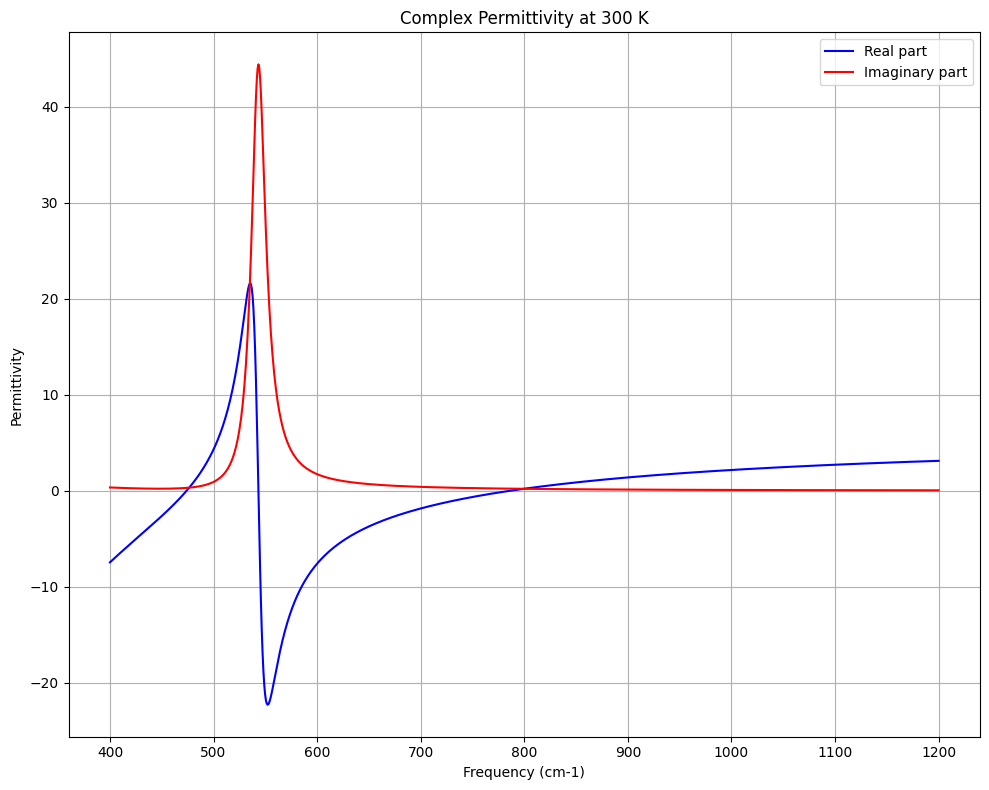

In [11]:
# Generate frequency range (adjust as needed)
omega = np.linspace(400, 1200, 1000) 

# Create a figure with subplots
fig, ax1 = plt.subplots( figsize=(10, 8))

# Plot for 300 K (modify temperature as needed)
temperature = 300
epsilon = compute_permittivity(omega, 'STO', temperature)#complex_permittivity_STO(omega, temperature)

# Plot real and imaginary parts
ax1.plot(omega, epsilon.real, label='Real part', color='blue')
ax1.plot(omega, epsilon.imag, label='Imaginary part', color='red')

# Formatting
ax1.set_title(f'Complex Permittivity at {temperature} K')
ax1.set_xlabel('Frequency (cm-1)')

ax1.set_ylabel('Permittivity')
ax1.grid(True)
ax1.legend()
# ax.set_xlim(0, 1000)  # Match frequency range

plt.tight_layout()
plt.show()

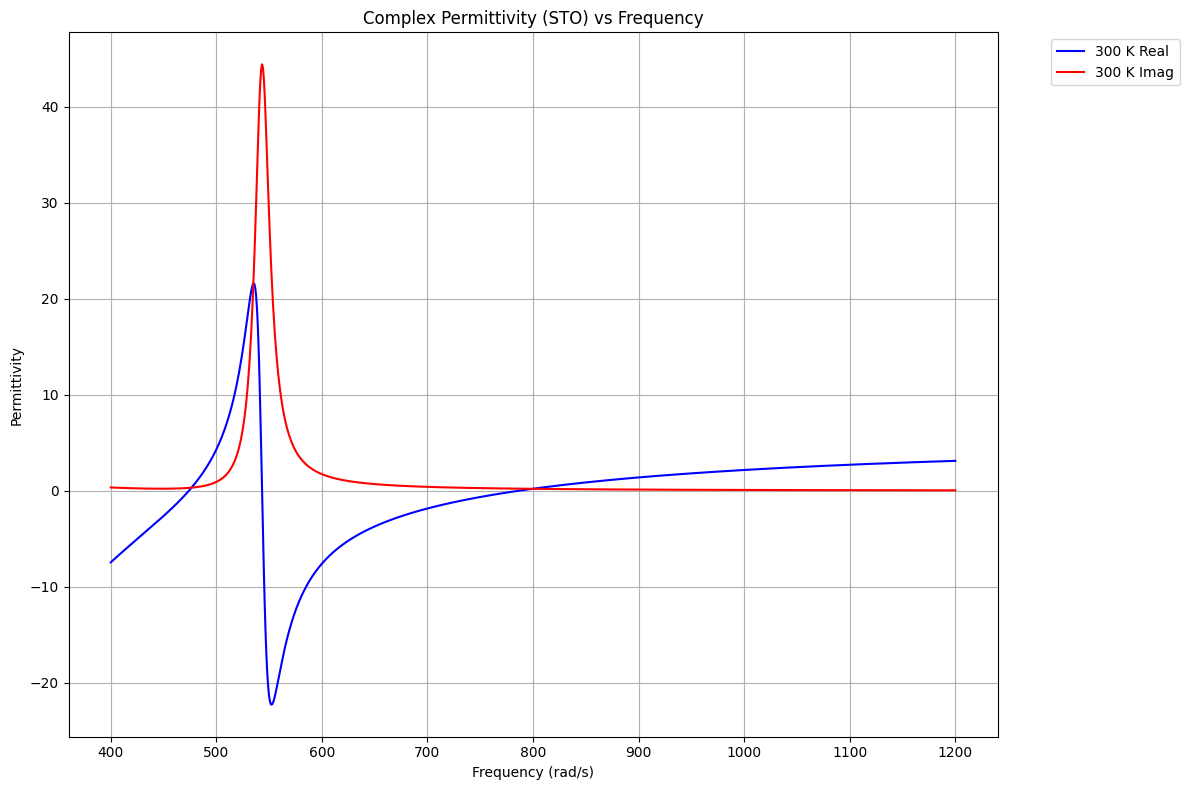

In [12]:
# Create a figure with all temperatures
temperatures = [300]#, 100, 200, 300]
omega = np.linspace(400, 1200, 1000)  # 0-1000 rad/s

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(12, 8))

temp = 300
epsilon = compute_permittivity(omega, 'STO', temp)#complex_permittivity_STO(omega, temp)
plt.plot(omega, epsilon.real, '-', color='blue', label=f'{temp} K Real')
plt.plot(omega, epsilon.imag, '-', color='red', label=f'{temp} K Imag')

plt.title('Complex Permittivity (STO) vs Frequency')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Permittivity')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlim(0, 500)
plt.tight_layout()
plt.show()

In [13]:
# @njit
# def calculate_epsilon(omega,  A_parameter, omega_0, gamma):
#     denominator = (omega_0**2-omega**2-1.0j*omega*gamma)
#     return 1 + A_parameter/denominator

@njit
def calculate_beta(epsilon):
    return (epsilon-1)/(epsilon+1)

@njit
def calculate_rp(epsilon_mat, theta_i):
    epsilon_air = 1.0 
    
    n1 = np.sqrt(epsilon_air)   
    n2 = np.sqrt(epsilon_mat)      
    # snell law
    sin_theta_t = (n1 / n2) * np.sin(theta_i)
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)  # non absorvent medium

    rp = (n2 * np.cos(theta_i) - n1 * cos_theta_t) / (n2 * np.cos(theta_i) + n1 * cos_theta_t)
    return rp

@njit
def calculate_f_parameter(g, radius, H, W, L):
    f = (g - (radius +2*H + W)/(2*L))*(np.log(4*L/(radius + 4*H +2*W)))/np.log(4*L/radius)
    return f

@njit
def calculate_H_t(t, A, Omega, H0):
    return H0 + A*(1 - np.cos(Omega*t))

@njit
def calculate_alpha_eff(beta, f0, f1):
    return 1 + 0.5 * (beta*f0)/(1 - beta*f1)


In [14]:
A_PARAMETER = 700**2 #cm⁻2
# OMEGA0 = 700 #cm⁻¹
# GAMMA = 20 #cm⁻¹
THETA_I = np.deg2rad(45)  # 45°

G = 0.7*(np.cos(0.06) + 1.0j*np.sin(0.06))

A = 18*1e-9 #m
RADIUS = 20*1e-9 #m
L = 300*1e-9 #m

W0 = 1.31*RADIUS
W1 = 0.5*RADIUS

Omega = 2*np.pi*(250*1e3) #rad/s
H0 = 0


def calculate_integrand(t, omega, n):
    epsilon = complex_permittivity_STO(omega)#calculate_epsilon(omega, A_PARAMETER, OMEGA0, GAMMA)
    beta = calculate_beta(epsilon)
    rp = calculate_rp(epsilon, THETA_I)
    
    H = calculate_H_t(t, A, Omega, H0)
    f0 = calculate_f_parameter(G, RADIUS, H, W0, L)
    f1 = calculate_f_parameter(G, RADIUS, H, W1, L)

    alpha_eff = calculate_alpha_eff(beta, f0, f1)

    integrand = ((1+rp)**2)*(alpha_eff) * (np.exp(-1.0j * Omega * n * t))
    return integrand


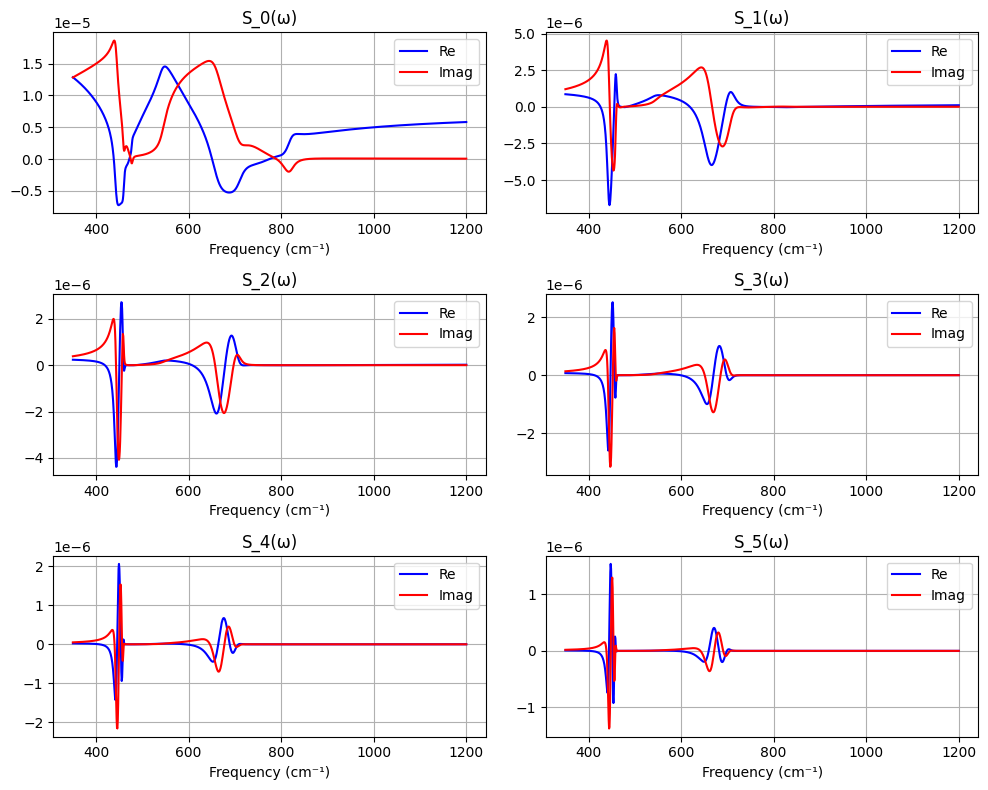

In [ ]:
omega_cm = np.linspace(350, 1200, 1000)  # Faixa experimental em cm⁻¹

n_values = [0, 1, 2, 3, 4, 5]
integrated_values = np.ndarray(shape=[len(omega_cm), len(n_values)], dtype=np.complex128)
 
for i, omega in enumerate(omega_cm):
    epsilon = compute_permittivity(omega, 'STO', temperature=300)
    for j, n_value in enumerate(n_values):
        result, error = quad_vec(lambda x: calculate_integrand(x, omega, n_value), 0, 2*np.pi/Omega)
        integrated_values[i, j] = result


fig, axs = plt.subplots(figsize = (10,8),nrows=int(len(n_values)/2), ncols=2)
axes = axs.flatten()
for i, n_value in enumerate(n_values):
    axes[i].plot(omega_cm, np.real(integrated_values[:, i]), label='Re', color='blue')
    axes[i].plot(omega_cm, np.imag(integrated_values[:, i]), label='Imag', color='red')
    axes[i].set_xlabel('Frequency (cm⁻¹)')
    axes[i].set_title(f'S_{n_value}(ω)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()


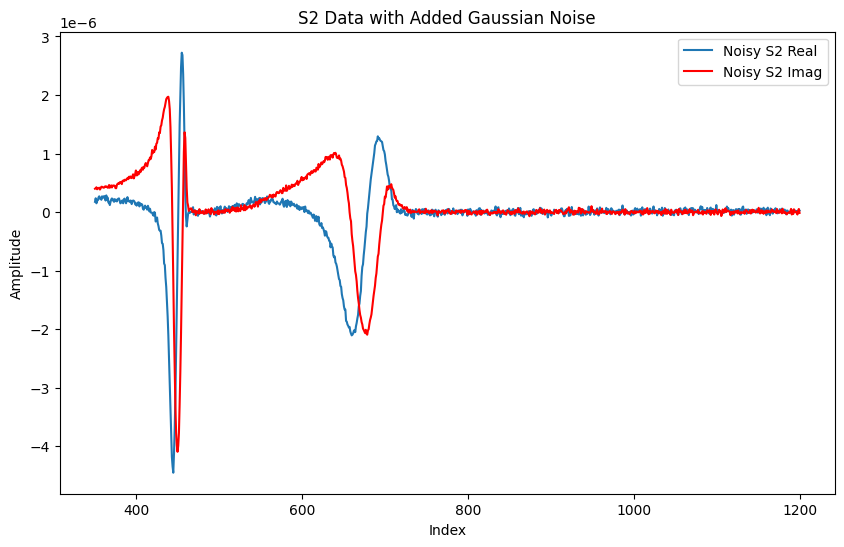

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Suppose S2 is a NumPy array of shape (N,) or (N, M)
# and you want to add Gaussian noise with mean=0, std=0.025.
# Adjust std to match your desired noise level.

S2_real =  np.real(integrated_values[:,2])#np.linspace(0, 1, 200)  # Example data
S2_imag =  np.imag(integrated_values[:,2])#np.linspace(0, 1, 200)  # Example data

S2_noisy = S2_real + np.random.normal(0, 0.035*1e-6, S2_real.shape) + \
           1j * (S2_imag + np.random.normal(0, 0.025*1e-6, S2_imag.shape))

# Plot the original and noisy signals
plt.figure(figsize=(10,6
                    ))
plt.plot(omega_cm, S2_noisy.real, label="Noisy S2 Real")
plt.plot(omega_cm, S2_noisy.imag, label="Noisy S2 Imag", color= 'red')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.title("S2 Data with Added Gaussian Noise")
plt.show()

In [17]:



epsilon_values = complex_permittivity_STO(omega_cm, temperature)

epsilon_values

import matplotlib.pyplot as plt0
import numpy as np

# Example data
x = np.real(epsilon_values[:])#np.array([1, 2, 3, 4, 5])  # x-coordinates
y = np.imag(epsilon_values[:])#np.array([10, 20, 30, 40, 50])  # y-coordinates
z = np.imag(S2_values[:])#np.array([100, 200, 300, 400, 500])  # Color values

# Create the scatter plot
plt.scatter(x, y, c=z, cmap='viridis')  # 'c' is for color, 'cmap' is the colormap

# Add a colorbar to show the mapping of z values to colors
plt.colorbar(label='Z Value')

# Add labels and title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot with Z as Color')

# Show the plot
plt.show()

NameError: name 'S2_values' is not defined

In [ ]:
S2_values

array([2.37085386e-07+3.85734974e-07j, 2.37029514e-07+3.85976896e-07j,
       2.36973542e-07+3.86219164e-07j, ...,
       2.09197654e-08+2.65397956e-09j, 2.09231757e-08+2.65434753e-09j,
       2.09265853e-08+2.65471546e-09j])